In [1]:
import numpy as np
import csv
import sys
import plotly.express as pxl
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
filename = 'June.csv'

In [3]:
fields = []
rows = []

with open('June.csv', 'r') as csvfile:
    csvfile = csvfile.read().split('\n')
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
data = pd.DataFrame(rows)

In [4]:
#locate Sleep data
df = data[data.eq('Sleep').any(axis=1)]
df

,0,1,2,3,4,5,6,7,8,9
32,Sleep,None,None,None,None,None,None,None,None,None


In [5]:
#Set dataframe with header of sleep data and following array
data_h = data.iloc[33]
data_b = data.iloc[34:64]
data = np.array(data_b)
data = pd.DataFrame(data, columns=data_h)
data = data.replace(',','', regex=True)
data = data.iloc[::-1]

In [6]:
data.head()

33,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,NaN
29,2020-06-01 10:38PM,2020-06-02 4:15AM,290,47,18,337,58,200,32,None
28,2020-06-02 9:18PM,2020-06-02 11:55PM,136,21,5,157,N/A,N/A,N/A,None
27,2020-06-03 1:37AM,2020-06-03 4:39AM,153,29,16,182,9,119,25,None
26,2020-06-03 11:05PM,2020-06-04 2:13AM,150,38,13,188,15,92,43,None
25,2020-06-04 11:22PM,2020-06-05 4:23AM,255,46,22,301,16,207,32,None


In [7]:
x1 = data['Minutes Asleep'].astype(str).astype(float)
y = data['Number of Awakenings'].astype(str).astype(int)

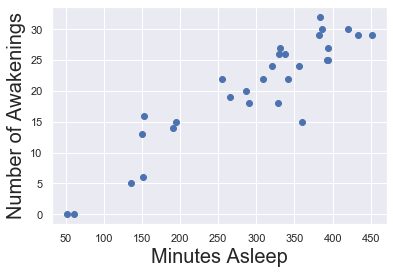

In [8]:
plt.scatter(x1,y)
plt.xlabel('Minutes Asleep',fontsize=20)
plt.ylabel('Number of Awakenings',fontsize=20)
plt.show()

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Number of Awakenings   R-squared:                       0.842
Model:                              OLS   Adj. R-squared:                  0.836
Method:                   Least Squares   F-statistic:                     149.2
Date:                  Fri, 31 Jul 2020   Prob (F-statistic):           9.76e-13
Time:                          20:42:52   Log-Likelihood:                -79.516
No. Observations:                    30   AIC:                             163.0
Df Residuals:                        28   BIC:                             165.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2264      1.875     -0.654      0.518      -5.067       2.614
Minutes Asleep     0.0730      0.006     12.216      0.000       0.061       0.085
==============================================================================
Omnibus:                        3.224   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.870
Skew:                          -0.549   Prob(JB):                        0.393
Kurtosis:                       3.539   Cond. No.                         909.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

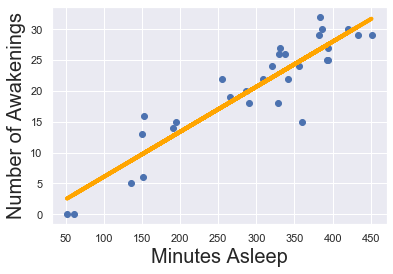

In [15]:
plt.scatter(x1,y)
yhat = x1*0.0730-1.2264
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Minutes Asleep', fontsize = 20)
plt.ylabel('Number of Awakenings', fontsize = 20)
plt.show()

In [11]:
#transform the inputs into a matrix (2D object)
x_matrix = x1.values.reshape(-1,1)
#regression itself
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#r-squared
reg.score(x_matrix,y)

0.8420223979697281

In [16]:
#prediction for how many times I'll wake up if I sleep for 150 minutes
reg.predict([[150]])

array([9.72082516])

I'm predicted to wake up close to 10 times during a 150 minute sleep window